In [9]:
import Neural_Network_Class as nn
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from tqdm import tqdm

nnfs.init()

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})


In [10]:
X, y = spiral_data(samples=100, classes=3)

dense1 = nn.Layer_Dense(2, 64)
activation1 = nn.Activation_ReLU()
dense2 = nn.Layer_Dense(64, 64)
activation2 = nn.Activation_ReLU()
dense3 = nn.Layer_Dense(64, 3)
output_activation = nn.Activation_Softmax()
loss_activation = nn.Activation_Softmax_Loss_CategoricalCrossentropy()
#optimizer = nn.Optimizer_SGD(learning_rate=1, decay=1e-3, momentum=0.9)
#optimizer = nn.Optimizer_RMSprop(learning_rate=0.02, decay=1e-3)
optimizer = nn.Optimizer_Adam(learning_rate=0.05, decay=5e-7)


In [11]:
def predict(new_X):
    dense1.forward(new_X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    output_activation.forward(dense3.output)
    predictions = np.argmax(output_activation.output, axis=1)
    return predictions

In [12]:
training_history = {'acc': [], 'loss': [], "LR": []}

for epoch in tqdm(range(10001)):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    loss = loss_activation.forward(dense3.output, y)
    training_history['loss'].append(loss)

    # Calculate accuracy from output of activation2 and targets
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)
    training_history['acc'].append(accuracy)

    #if not epoch % 100:
    #    print(f'epoch: {epoch}, ' +
    #          f'acc: {accuracy:.3f}, ' +
    #          f'loss: {loss:.3f}, ')
    #            
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense3.backward(loss_activation.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()
    training_history['LR'].append(optimizer.current_learning_rate)

100%|██████████| 10001/10001 [00:13<00:00, 768.78it/s]


[-0.45295511 -0.22340027] Class 0 BLUE\
[ 0.26904075 -0.42742612] Class 1 WHITE\
[0.31417774 0.39543439]   Class 2 RED

In [13]:
predict(np.array([[-0.75, -0.75], [0.75, 0.75]]))

array([0, 1], dtype=int64)

(1000000, 2)
(300, 2)


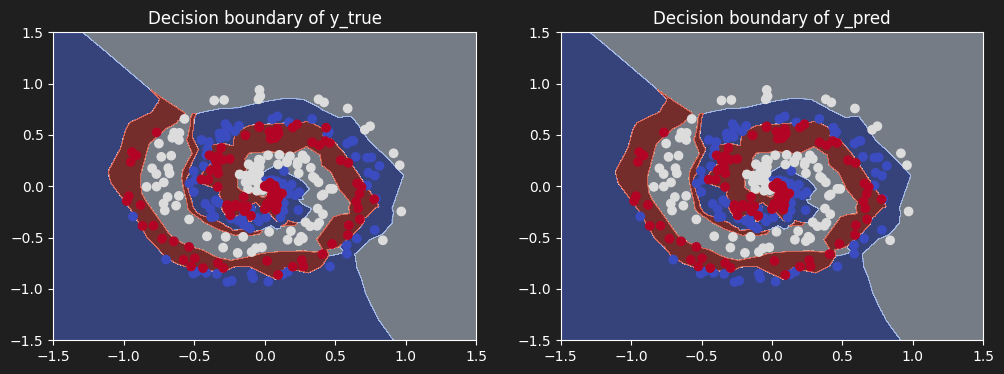

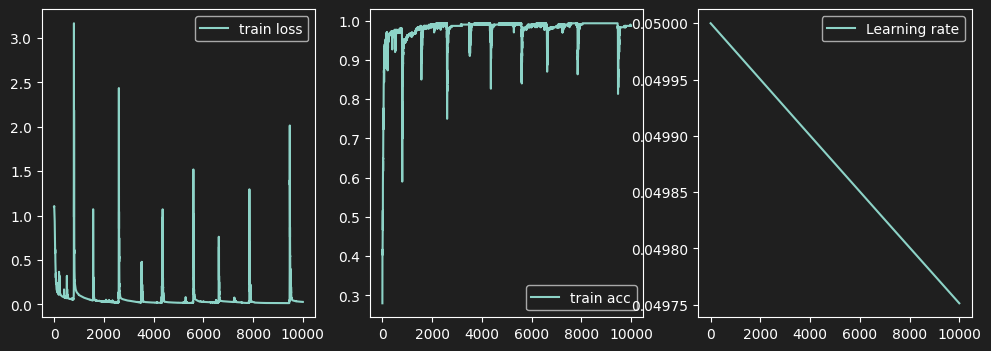

In [14]:
# Frontiere de décision
x1 = np.linspace(-1.5, 1.5, 1000)
x2 = np.linspace(-1.5, 1.5, 1000)
xx1, xx2 = np.meshgrid(x1, x2)
grid = np.vstack((xx1.ravel(), xx2.ravel())).T # Concatenation des deux matrices ligne par ligne
print(grid.shape)
Z = predict(grid)
Z = Z.reshape(xx1.shape)

print(X.shape)
# Plot frontiere de décision
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.contourf(xx1, xx2, Z, cmap='coolwarm', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='coolwarm')
plt.title('Decision boundary of y_true')
plt.subplot(1, 2, 2)
plt.contourf(xx1, xx2, Z, cmap='coolwarm', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=predictions.flatten(), cmap='coolwarm')
plt.title('Decision boundary of y_pred')

# Plot courbe d'apprentissage
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(training_history["loss"], label='train loss')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(training_history["acc"], label='train acc')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(training_history["LR"], label='Learning rate')
plt.legend()
plt.show()

# Optimizer_SGD
loss = 0.22790482295835018 with LR=0.4 \
acc = 0.983333333333333333 with LR=0.4 \
\
loss = 0.14923935475986344 with LR=0.45 \
acc = 0.9433333333333334 with LR=0.45 \
\
loss = 0.0982215413286657 with LR=1 and decay=1e-2 \
acc = 0.9533333333333334 with LR=1 and decay=1e-2 \
\
loss = 0.07869791024912981 with LR=1 and decay=1e-3 and momentum=0.9 \
acc = 0.9700000000000000000 with LR=1 and decay=1e-3 and momentum=0.9 \
\
# Optimizer_RMSprop(learning_rate=0.02, decay=1e-3)
loss = 0.011743765089963543
acc = 0.9933333333333333
\
# Optimizer_Adam(learning_rate=0.02, decay=1e-5)
loss = 0.015543712
acc = 0.9933333333333333

In [15]:
loss

0.029011777

In [16]:
accuracy

0.9866666666666667